In [ ]:
# 1-1. 이미지 width를 리스트에 저장한 후, 범주형 데이터로 가공하기 
# 1-2. width 범주 데이터를 막대 그래프로 시각화하기
# 2-1. 이미지 height를 리스트에 저장한 후, 범주형 데이터로 가공하기 
# 2-2. height 범주 데이터를 막대 그래프로 시각화하기
# 2-1. 이미지 width의 최빈값, 평균값 구하기
# 2-2. 이미지 height의 최빈값, 평균값 구하기


# 번외 : N x N 사이즈로 일괄 변형하기

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm_notebook

In [5]:
print(f"👉 원래 이미지 개수 : {len(os.listdir('./Origin_Img/'))}개")

👉 원래 이미지 개수 : 1657개


In [6]:
# 온전한 성운 이미지만 직접 선별함
print(f"👉 선별 이미지 개수 : {len(os.listdir('./Img_Selection/'))}개")

👉 선별 이미지 개수 : 1632개


In [7]:
img = cv2.imread('./Img_Selection/Nebula0001.jpg')
h, w, c = img.shape
print(h)

328


In [16]:
height_li = []
width_li = []

not_read_fn_li = []

for fn in os.listdir('./Img_Selection/'):
    try:
        img = cv2.imread(f"./Img_Selection/{fn}")

        h, w, _ = img.shape

        height_li.append(h)
        width_li.append(w)
        
    except AttributeError:
        not_read_fn_li.append(fn)
        print(f"{fn} 파일은 shape 정보를 읽어올 수 없습니다...")

Nebula0055.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula0319.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula0461.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula0660.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula0890.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula1009.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula1446.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula1512.jpg 파일은 shape 정보를 읽어올 수 없습니다...
Nebula1648.jpg 파일은 shape 정보를 읽어올 수 없습니다...


In [9]:
select_len = len(os.listdir('./Img_Selection/'))
print(f"👉 shape 정보 확인한 이미지 개수 : {select_len - len(not_read_fn_li)}개")

👉 shape 정보 확인한 이미지 개수 : 1623개


In [80]:
def bar_chart_with_frequencies(data, title, x_label, y_label):
    # 데이터 분석: 빈도수 계산
    frequencies = {}
    for item in data:
        frequencies[item] = frequencies.get(item, 0) + 1

    # 빈도수를 기준으로 항목과 빈도수를 분리
    items = list(frequencies.keys())
    counts = list(frequencies.values())
    
    # 막대그래프 생성
    plt.bar(items, counts)

    # 그래프 제목, x축 라벨, y축 라벨 설정
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(items)
    
    plt.ylim([0, 50])

    # 그래프 보여주기
    plt.show()

[328, 600, 599, 484, 545, 547, 355, 567, 536, 458, 387, 390, 474, 597, 532, 495, 549, 348, 450, 527, 465, 541, 592, 501, 533, 528, 273, 272, 598, 535, 278, 560, 188, 551, 517, 323, 494, 526, 229, 584, 510, 576, 228, 583, 347, 316, 350, 522, 504, 446, 512, 349, 483, 487, 530, 385, 392, 590, 513, 540, 537, 544, 506, 521, 531, 318, 447, 574, 163, 564, 343, 578, 475, 571, 397, 125, 417, 414, 175, 365, 224, 225, 440, 565, 520, 486, 500, 477, 345, 399, 488, 556, 325, 281, 260, 478, 507, 422, 306, 303, 244, 441, 435, 514, 491, 321, 369, 561, 582, 242, 362, 538, 508, 466, 469, 460, 449, 490, 548, 529, 558, 518, 402, 398, 480, 401, 503, 451, 439, 411, 485, 543, 400, 591, 534, 492, 542, 594, 453, 525, 593, 395, 568, 310, 309, 489, 476, 497, 493, 363, 524, 563, 425, 559, 462, 445, 519, 552, 473, 432, 300, 437, 589, 128, 337, 523, 315, 572, 438, 301, 577, 580, 461, 383, 516, 280, 168, 569, 472, 202, 496, 573, 429, 274, 324, 403, 409, 295, 296, 427, 277, 288, 287, 550, 557, 389, 431, 586, 294, 270,

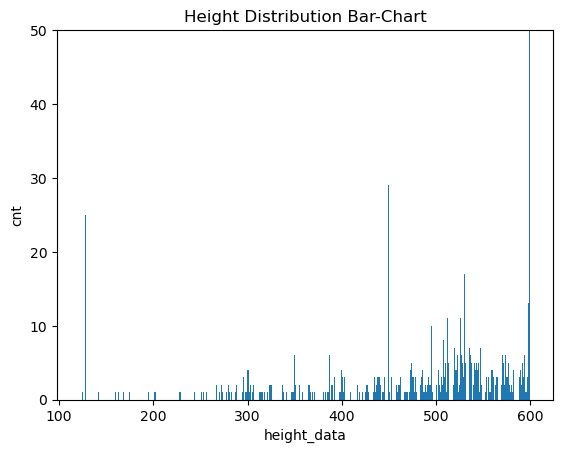

In [81]:
# 막대그래프 호출
bar_chart_with_frequencies(height_li, 'Height Distribution Bar-Chart', 
                           'height_data', 'cnt')

### 👉 번외 : 이미지 NxN 사이즈로 조정하기

In [22]:
new_dir = "./img_448_size"
if not os.path.isdir(new_dir):
    os.mkdir(new_dir)

for fn in tqdm_notebook(os.listdir('./Img_Selection/')):
    if fn in not_read_fn_li:
        continue
    
    img = cv2.imread(f"./Img_Selection/{fn}")
    resize_img = cv2.resize(img, dsize=(448, 448), interpolation=cv2.INTER_NEAREST)

    cv2.imwrite(f"{new_dir}/{fn}", resize_img)

  0%|          | 0/1632 [00:00<?, ?it/s]